<a href="https://colab.research.google.com/github/ranuganes/statistics_academy/blob/master/Sentiment_Analysis_Statistics_Academy_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

Pada tutorial ini, kita akan menggunakan data product review dari salah satu ecommerce yang ada di Indonesia. Metode yang akan kita gunakan adalah **Support Vector Machine (SVM)**. Sentimen negatif mewakili review dengan bintang 1 dan 2, sedangkan sentimen positif mewakili review dengan bintang 4 dan 5.


Install library yang dibutuhkan (tidak tersedia pada google colab default)

In [ ]:
!pip install Sastrawi

## **1. Load Dataset**

Create folder "statistics_academy" pada google drive. Pastikan folder tersebut berada di root (bagian terluar google drive). 

Open link ini
[statistics_academy folder](https://drive.google.com/drive/u/0/folders/1sy8Y2Jz5qapQCJxG8n9a5ob7Ul3Okh6F), lalu copy file "dataset_product_review.csv" ke dalam folder "statistics_academy".

Connect google colab dengan google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load dataset ke dalam dataframe

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/statistics_academy/dataset_product_review.csv')

## **2. Preprocessing Data**

Preprocessing adalah proses pada data sebelum data dibuat dalam bentuk vektor, seperti:
* Convert to lowercase
* Replace double space with single space
* Remove punctuation
* Stemming (ubah kata berimbuhan menjadi kata dasar)
* Singkatan atau abreviasi
* Typo handling
* Slang word / kata gaul
* Handling imbalance data
* dll (sesuai dengan kebutuhan dataset)


Berikut preprocessing data yang digunakan dan disiapkan dalam bentuk function:

In [ ]:
import pandas as pd
import re
from string import punctuation
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# ? Initialization
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def convert_to_lower_case(text):
    text = text.lower()
    return text

def remove_punctuation(text):
    for x in punctuation:
        text = text.replace(x, " ")
    return text

def remove_double_space(text):
    text = re.sub('\s+',' ',text)
    return text.strip()

def stemming(text):
    text = stemmer.stem(text)
    return text

def preprocessing_text(text):
    text = convert_to_lower_case(text)
    text = remove_punctuation(text)
    text = remove_double_space(text)
    # text = stemming(text)
    return text

Lakukan preprocessing pada data review dan dimasukkan kedalam column "cleaned_text"

In [ ]:
df['cleaned_text'] = [preprocessing_text(x) for x in df['text']]
df.head(5)

Masukkan "cleaned_text" dan "label" column masing-masing kedalam object list

In [ ]:
X = df['cleaned_text'].values.tolist()
y = df['label'].values.tolist()

Encode label / variable y menjadi numeric. Karena hanya dua kelas, maka bisa diubah menjadi 0 dan 1. Lalu buat label_map nya untuk mengembalikan nilai 0 dan 1 dalam text.

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
label = labelencoder.fit(y)

label_map = {}
for i,x in enumerate(list(label.classes_)):
  label_map.update({i:x})
print(label_map)

y = label.transform(y)

Split dataset menjadi data train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)

## **3. Vectorizing Data**

Vectorizing adalah proses mengubah data teks kedalam vector. 

Ada beberapa metode dalam mentransformasi teks kedalam vector:
* **Bag of Words Model**

  Bag of words digunakan untuk menghitung seberapa sering muncul token tertentu.
  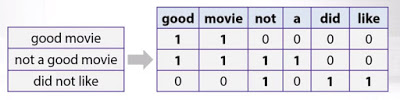
* **TF-IDF (Term Frequency and Inverse Document Frequency)**

  TF (Term Frequency) adalah frekuensi dari kemunculan sebuah term dalam dokumen yang bersangkutan

  IDF (Inverse Document Frequency) merupakan sebuah perhitungan dari bagaimana term didistribusikan secara luas pada koleksi dokumen yang bersangkutan

  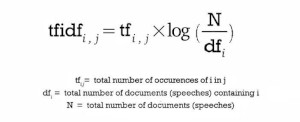
* Word Embeddings

  Pada dasarnya merubah kata-kata ke dalam vector namun menggunakan pendekatan jaringan syaraf tiruan.

 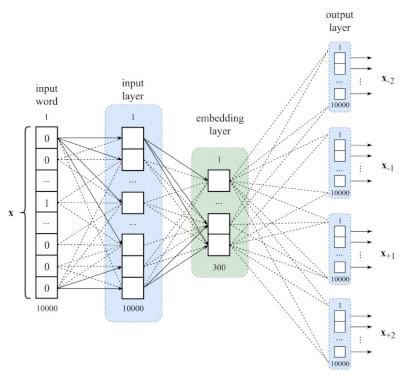

Pada tutorial ini, vectorizing akan menggunakan TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ? Create feature vectors
vectorizer = TfidfVectorizer(min_df, max_df = 0.8)

train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

*parameter dari TfidfVectorizer

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

## **4. Building Sentiment Analysis Model**

Metode yang digunakan adalah Support Vector Machine.

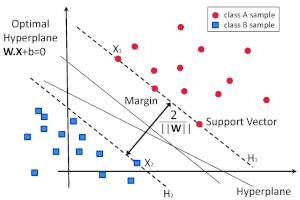

In [ ]:
from sklearn import svm

model = svm.SVC(C=1.0, gamma='auto' ,kernel='rbf', random_state=6)
model.fit(train_vectors, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=6, shrinking=True, tol=0.001,
    verbose=False)

Evaluasi model dengan data testing yang telah di split sebelumnya. Hal ini merepresentasikan data baru atau data yang belum pernah ditemui sebelumnya.

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_vectors)

print(classification_report(y_test, y_pred))


## **5. Fine-tune Model / Model Selection**

Tahap ini adalah proses menemukan hasil yang maksimal dari model berdasarkan kombinasi **hyperparameter** yang ada. Salah satu hyperparameter dari SVM adalah kernel. 

Secara umum, fungsi kernel RBF direkomendasikan sebagai fungsi kernel pada SVM (Hsu, 2013). Dikarenakan menggunakan kernel RBF, maka hyperparameter yang dapat dioptimasi adalah **C** dan **Gamma**.




**Grid-search** adalah salah satu prosedur pemilihan model yang
direkomendasikan untuk menentukan nilai optimal dari
parameter C dan Gamma (Hsu, 2013)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel':['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10], 'gamma':[0.001, 0.01, 0.1, 1, 10]}

svc = svm.SVC(random_state=6)
fine_tuned_model = GridSearchCV(estimator=svc, param_grid = param_grid, cv=5)
fine_tuned_model.fit(train_vectors, y_train)

In [ ]:
fine_tuned_model.best_params_

In [ ]:
from sklearn.metrics import classification_report

y_pred = fine_tuned_model.predict(test_vectors)

print(classification_report(y_test, y_pred))

-------